# CDS: Numerical Methods - Assignment 1

#### See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord!

- Solutions must be submitted via Brightspace as a Jupyter notebook (\*.ipynb) before **Wednesday, February 3, 8:30 CET.**

### Handing-in:

1. Click "Kernel -> Restart & Run All"
2. Check all outputs (In[\*] or Out[\*]) for errors and **resolve them if necessary**
3. Click again "Kernel -> Restart & Run All"
4. Save as assignment_01_TEAM-NUMBER.ipynb by clicking "File -> Save as ..."
5. Download your assignment_\*.ipynb file
6. Upload it **in time (before the deadline)** to Brightspace

## 1. Rounding and Truncation Error Analysis

Euler's number $e$ can be represented as the infinite series $e = \sum_{n=0}^{\infty} \frac{1}{n!}$. In order to evaluate it in Python we need to truncate the series. Furthermore, we learned that every number representation and floating-point operation introduces a finite error. Thus, let's analyze the truncated series 

$$\tilde{e} = \sum_{n=0}^{N} \frac{1}{n!}$$ 

in more detail.

### Task 1.1

Calculate $\tilde{e}$ with Python and plot the relative error $ \delta = \left| \frac{\tilde{e} - e}{e} \right|$ as a function of $N$ (use a log-scale for the $y$ axis).

100%|██████████| 30/30 [00:00<00:00, 54971.22it/s]


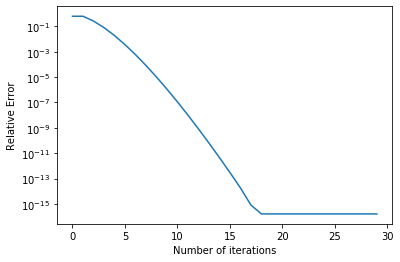

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
def rel_error(N):
    e_approx = 1
    fact = 1

    for i in range(1, N):
        fact *= i
        e_approx += 1/fact

    return np.abs((e_approx-np.e)/np.e)

errors = np.zeros(30)
for i in tqdm(range(30)):
    errors[i] = rel_error(i)
plt.plot(np.arange(30), errors)
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Relative Error')
plt.show()



### Task 1.2 

Compare the relative errors $\delta$ for different floating point precisions as a function of $N$. To this end, we define each element of the series $e_n = \frac{1}{n!}$ and convert it to double-precision (64 bit) and single-precision (32 bit) floating points **before** adding them up. This can be done by using Numpy's functions $\text{numpy.float64(e_n)}$ and $\text{numpy.float32(e_n)}$, respectively.

100%|██████████| 30/30 [00:00<00:00, 20757.03it/s]


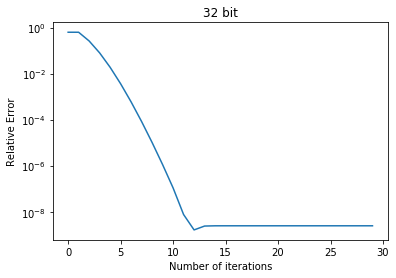

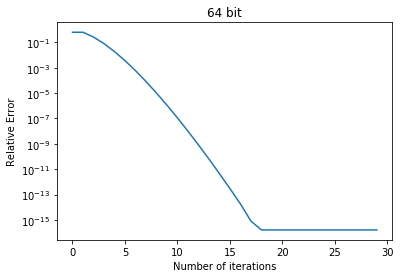

In [ ]:
def rel_error(N):
    e_approx64 = 1
    e_approx32 = 1
    fact = 1

    for i in range(1, N):
        fact *= i
        e_approx32 += np.float32(1/fact)
        e_approx64 += np.float64(1/fact)

    return np.abs((e_approx32-np.e)/np.e), np.abs((e_approx64-np.e)/np.e)

errors32 = np.zeros(30)
errors64 = np.zeros(30)
for i in tqdm(range(30)):
    errors32[i], errors64[i] = rel_error(i)
plt.plot(np.arange(30), errors32)
plt.title('32 bit')
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Relative Error')
plt.show()
plt.figure()
plt.plot(np.arange(30), errors64)
plt.title('64 bit')
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Relative Error')
plt.show()

The 64-bit error becomes much lower than the 32-bit error, this is to be expected. 

### Task 1.3

Compare the relative errors $\delta$ for different rounding accuracies as a function of $N$. Use Python's $\text{round(e_n, d)}$ function, where $d$ is the number of returned digits, to round each $e_n$ element before adding them up. Plot $\delta$ vs. $N$ for $d = 1,2,3,4,5$ and add a corresponding legend.

100%|██████████| 30/30 [00:00<00:00, 400.83it/s]


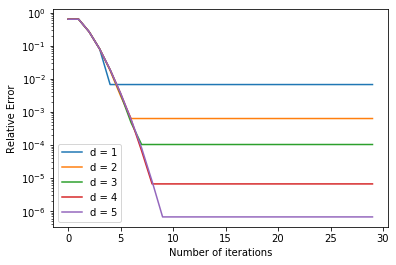

In [ ]:
def rel_error(N):
    e_approx1 = 1
    e_approx2 = 1
    e_approx3 = 1
    e_approx4 = 1
    e_approx5 = 1
    
    fact = 1

    for i in range(1, N):
        fact *= i
        e_approx1 += np.round(1/fact, 1)
        e_approx2 += np.round(1/fact, 2)
        e_approx3 += np.round(1/fact, 3)
        e_approx4 += np.round(1/fact, 4)
        e_approx5 += np.round(1/fact, 5)
        
    return np.abs((e_approx1-np.e)/np.e), np.abs((e_approx2-np.e)/np.e), np.abs((e_approx3-np.e)/np.e), np.abs((e_approx4-np.e)/np.e), np.abs((e_approx5-np.e)/np.e)

errors1 = np.zeros(30)
errors2 = np.zeros(30)
errors3 = np.zeros(30)
errors4 = np.zeros(30)
errors5 = np.zeros(30)

for i in tqdm(range(30)):
    errors1[i], errors2[i], errors3[i], errors4[i], errors5[i] = rel_error(i)
plt.plot(np.arange(30), errors1, label ='d = 1')
plt.plot(np.arange(30), errors2, label ='d = 2')
plt.plot(np.arange(30), errors3, label ='d = 3')
plt.plot(np.arange(30), errors4, label ='d = 4')
plt.plot(np.arange(30), errors5, label ='d = 5')
plt.legend()
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel('Relative Error')
plt.show()

The error becomes smaller the more digits we allow during the rounding phase, again this is to be expected. 

### Some examples

In [ ]:
import numpy as np

# using float32
a = 0.1234
b = np.float32(a)

# using round
c = round(a, 2)

print(a)
print(b)
print(c)

0.1234
0.1234
0.12


# Weekly Reflection

- How do you judge the level of the last lecture on a scale from 1 to 5?
- with: 1: easy to follow, 3: OK to follow, 5: too complicated to follow

1, the lessons were easy to follow

- How long did it take you to complete this assignment?

10-15 minutes

- How hard was it to finish this assignment on a scale from 1 to 5?
- with: 1: easy / no help needed, 3: could solve with guidance, 5: could not solve it

1, I found this exercise pretty simple